In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [25]:
data = pd.read_csv('Cars93.csv')
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile','Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Weight']])
y = np.array(data['Price'].values.reshape(-1,1))

In [36]:
alphas = np.logspace(-5,0,100)
papuaNewGuinea = LeaveOneOut()
papuaNewGuinea.get_n_splits(X)
MSE = []
for i in alphas:
    MSEa=[]
    for train_index, test_index in papuaNewGuinea.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = linear_model.Lasso(alpha=i, normalize = True)
        clf.fit(X_train, y_train)
        intento = clf.predict(X_test)
        yei = mean_squared_error(y_test, intento)
        MSEa.append(yei)
    MSEa = np.array(MSEa)
    MSE.append(np.mean(MSEa))

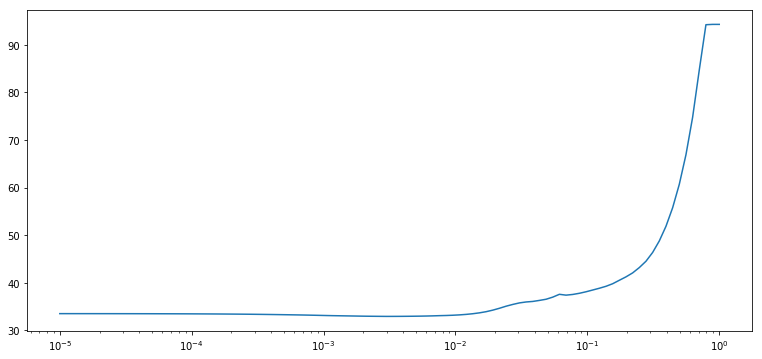

In [44]:

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(alphas, MSE)

ax.set_xscale('log')